In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


For the first part of the project which is the exploratory data analysis we will utilise the pandas library, which is an open source and easy to use exploratory data analysis tool created on top of the python programming language.It is imported via the statement bellow:


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/realtor-data.zip.csv')


The first part of the process of data analysis is a process called Exploratory data analysis and the data cleaning where the data is analysed in order to have a view of its size, dimensions and its composition and then it is also cleaned.After the data has been loaded into the system, it is helpfull to have an overview of the structure by the use of the head function of pandas which will show the first five rows in the dataset


In [ ]:
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


After having a view of the dataset, a further analysis is implemented to find the dimensions of the dataset through the use of the shape function which shows the number of rows and columns as follows:


In [ ]:
data.shape

(904966, 10)

As can be dataset consists of nine hundred and four thousands nine hundred and sixty six rows and ten columns.seen the Furthermore, an analysis can be carried out on the data set to determine the data types of the various columns as follows:


In [ ]:
data.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

As can be seen from above, the dataset consists a combination of objects or string and numerical values. After this is done it is also necessary to remove all the duplicatete rows in this dataset as it is always possible that some rows may have been erroneousely entered twice or more.This is done by the use of the drop duplicates method in which we pass a parameter of inplace as being true to indicate that we are modifying the current database


In [ ]:
 data.drop_duplicates(inplace=True)
 data.shape

(110101, 10)

After the duplicates have been dropped it is then necessary to once again check the dimensions of the data set to ensure that indeed some rows have been removed reducing the number of rows to one hundred and ten thousand, one hundred and one which is a lot less than the original and hence will significantly increase the accuracy of the model as shown above:


The second part of the data analysis process is known as data cleaning, this process will involve the fixing or removing of incomplete data and data that is not correctly formatted. this process will begin with the identification of all those rows that contain null values through the us of the pandas is null function as shown below:


In [ ]:
data.isna().sum()

status                0
bed               16770
bath              15586
acre_lot          29882
city                 22
state                 0
zip_code             32
house_size        35311
prev_sold_date    51883
price                18
dtype: int64

From the above data it can be seen that many of the columns namely the bed, bath, acres , house size contain alot of null values. It can also be observed that these columns represent numerical values which will have to be handled differently from the other values like city and zip code which are non numeric.For the first four columns namely bed , bath acre and house size we have to consider that the number of null values is too great to ignore and sice these are numerical values, the best solution is to replace each of the null values in the column by the median value of that column, for example in the case of the bed column, for each of the rows that have a null value for the bed column, it is replaced by the calculated median value of all the bed values in the dataset.This is carried out for all the columns with null values as shown below:


In [ ]:
data['bed'].fillna(data['bed'].median(), inplace=True)
data['bath'].fillna(data['bath'].median(), inplace=True)
data['acre_lot'].fillna(data['acre_lot'].mean(), inplace=True)
data['house_size'].fillna(data['house_size'].mean(), inplace=True)
data.isna().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                 22
state                 0
zip_code             32
house_size            0
prev_sold_date    51883
price                18
dtype: int64

At this stage it can be observed that there are some non numerical columns that still retain null as since the count of these columns is very low as compared to the number of rows in the data set it would be preferable to just drop these rows containing null values, also the column price also has null values and since this is a variable that also has few nulls it too can have all it's rows with nulls removed. The operation can then be done on all three columns as shown below:


In [ ]:
data = data.dropna(subset=['zip_code','city', 'price'])
data.isna().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    51826
price                 0
dtype: int64

Finally, the last column that has to be dealt with is the previous sold date, this column is a non numeric column an also happens to have a substantially large amount of nulls therefore the best approach would be to simply drop this column as a whole as shown below:


In [ ]:
data = data.drop('prev_sold_date', axis=1)
data.isna().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

When dealing with categorical data it is necessary to know the number of unique fields for each column in order to properly determine how to deal with them as we cannot have a column with a very high number of unique fields this is done with the unique function as follows:


In [ ]:
data['state'].nunique()

18

In [ ]:
data['status'].nunique()

2

In [ ]:
data['zip_code'].nunique()

3140

In [ ]:
data['city'].nunique()

2486

As can be seen from the above, two particular columns stand out as having a very high amount of unique values these are the city category and the zip code category. in order to deal with these it is necessary to first view the distribution of the various entries beginning first with the zip code where  the first 50 zip codes are viewed together with their corresponding value counts,from this it can be seen that from the top twenty zip codes, we get the highest values and the ones that follow are relatively low.

In [ ]:
vz = data['zip_code'].value_counts()
vz.head(50)

10023.0    718
10022.0    649
10011.0    642
11201.0    609
10016.0    587
10021.0    535
10028.0    438
10019.0    419
10065.0    411
10003.0    402
10024.0    400
10128.0    398
8401.0     396
8226.0     389
11235.0    348
10013.0    338
10075.0    337
10025.0    333
8831.0     328
8527.0     327
820.0      322
8753.0     316
19146.0    313
10010.0    308
19134.0    307
8260.0     305
11209.0    303
10014.0    300
8759.0     292
10463.0    285
10027.0    283
10002.0    275
8234.0     272
11215.0    264
8757.0     262
8701.0     255
8087.0     255
19143.0    250
19145.0    249
8332.0     241
7024.0     238
6010.0     236
8330.0     233
19148.0    233
10314.0    233
11229.0    228
11375.0    226
19124.0    226
11234.0    221
10301.0    220
Name: zip_code, dtype: int64

Therefore in order to reduce on the number of zip code types for the purpose of creating a function that can be used to predict the house price, we first get the zip codes of the top twenty values in the data set, then from these a  function is created that takes the first twenty zip code values as they are and then bundles the remaining zip code types into a new zip code entry called other and thus reducing on the number of zip code types in the dataset as shown below:

In [ ]:
df_top_20 = data['zip_code'].value_counts().nlargest(20).index
df_top_20

Float64Index([10023.0, 10022.0, 10011.0, 11201.0, 10016.0, 10021.0, 10028.0,
              10019.0, 10065.0, 10003.0, 10024.0, 10128.0,  8401.0,  8226.0,
              11235.0, 10013.0, 10075.0, 10025.0,  8831.0,  8527.0],
             dtype='float64')

In [ ]:
data['zip_code_cat'] = data['zip_code'].where(data['zip_code'].isin(df_top_20), 'other_code')
data['zip_code_cat'].value_counts()

other_code    101040
10023.0          718
10022.0          649
10011.0          642
11201.0          609
10016.0          587
10021.0          535
10028.0          438
10019.0          419
10065.0          411
10003.0          402
10024.0          400
10128.0          398
8401.0           396
8226.0           389
11235.0          348
10013.0          338
10075.0          337
10025.0          333
8831.0           328
8527.0           327
Name: zip_code_cat, dtype: int64

After this conversion a new column called zip code cat is created that now contains a new type of zip code category called other code that contains all the zip codes that have a relatively low value count for the zip code entriesas shoown below.

In [ ]:
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,zip_code_cat
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,other_code
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,other_code
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,other_code
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,other_code
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2158.001979,65000.0,other_code


After this operation has been done, it is also applied to the city column which also has a high number of city types. As done previousely, the top twenty cities with the highest value counts is obtained and the rest is bundled up into a new category called other city as shown below:

In [ ]:
df_top_20_2 = data['city'].value_counts().nlargest(20).index
df_top_20

Float64Index([10023.0, 10022.0, 10011.0, 11201.0, 10016.0, 10021.0, 10028.0,
              10019.0, 10065.0, 10003.0, 10024.0, 10128.0,  8401.0,  8226.0,
              11235.0, 10013.0, 10075.0, 10025.0,  8831.0,  8527.0],
             dtype='float64')

In [ ]:
data['city_cat'] = data['city'].where(data['city'].isin(df_top_20_2), 'other_city')
data['city_cat'].value_counts()

other_city       78834
New York City     6560
Philadelphia      5418
New York          4997
Brooklyn          3051
Staten Island     1579
Bronx             1387
Boston            1228
Toms River         739
Newark             734
Manhattan          702
Wilmington         652
Jersey City        624
Middletown         484
Bridgeport         466
Manchester         463
Stamford           452
Providence         433
Trenton            422
Waterbury          413
San Juan           406
Name: city_cat, dtype: int64

After this operation, the dataset is viewed to show the new columns that have been created namely zip code category and the city category. After the vreation of these columns, it is then necessary to get rid of the old columns through the use of the drop function as shown below:

In [ ]:
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,zip_code_cat,city_cat
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,other_code,other_city
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,other_code,other_city
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,other_code,other_city
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,other_code,other_city
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2158.001979,65000.0,other_code,other_city


In [ ]:
data = data.drop('city', axis = 1)
data = data.drop('zip_code', axis = 1)
data.head()

,status,bed,bath,acre_lot,state,house_size,price,zip_code_cat,city_cat
0,for_sale,3.0,2.0,0.12,Puerto Rico,920.000000,105000.0,other_code,other_city
1,for_sale,4.0,2.0,0.08,Puerto Rico,1527.000000,80000.0,other_code,other_city
2,for_sale,2.0,1.0,0.15,Puerto Rico,748.000000,67000.0,other_code,other_city
3,for_sale,4.0,2.0,0.10,Puerto Rico,1800.000000,145000.0,other_code,other_city
4,for_sale,6.0,2.0,0.05,Puerto Rico,2158.001979,65000.0,other_code,other_city


In [ ]:
data.dtypes

status           object
bed             float64
bath            float64
acre_lot        float64
state            object
house_size      float64
price           float64
zip_code_cat     object
city_cat         object
dtype: object

The third part of the process is called the data visualisation which consists of the actual viewing of the data distribution, but firstly  it is  important to get a statistical description of the dataset in order to see the dispersion of the data in the dataset, the central tendancy and the overall distribution shape. This is done through the use of the shape function as shown below which gives for each of the numerical columns the mean value, the standard deviation and a distribution of the various percentiles.

In [ ]:
data.describe()

,bed,bath,acre_lot,house_size,price
count,110044.000000,110044.000000,110044.000000,1.100440e+05,1.100440e+05
mean,3.266348,2.444513,18.185762,2.158055e+03,9.142895e+05
std,1.722714,1.619403,850.950375,4.876108e+03,3.456388e+06
min,1.000000,1.000000,0.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.150000,1.371000e+03,2.500000e+05
50%,3.000000,2.000000,0.700000,2.158002e+03,4.499000e+05
75%,4.000000,3.000000,18.181671,2.158002e+03,8.019950e+05
max,123.000000,198.000000,100000.000000,1.450112e+06,8.750000e+08


As can be seen from above the first three columns of bed, bath, acre lot are fairly evenly distributed in the lower range, when we get to the maximum values it is noticed that there are very high values, this would indicate the existence of outliers that will have to be dealt with later on. After the distribution is viewed it is also necessary to view the heatmap of the dataset. This diagram represents the correlation that exists between each of the columns on a scale of zero to one where the higher the value the more the correlation between the columns and the darker the color the less the correlation.

<ipython-input-25-2ed71b1d8386>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(),


<function matplotlib.pyplot.show(close=None, block=None)>

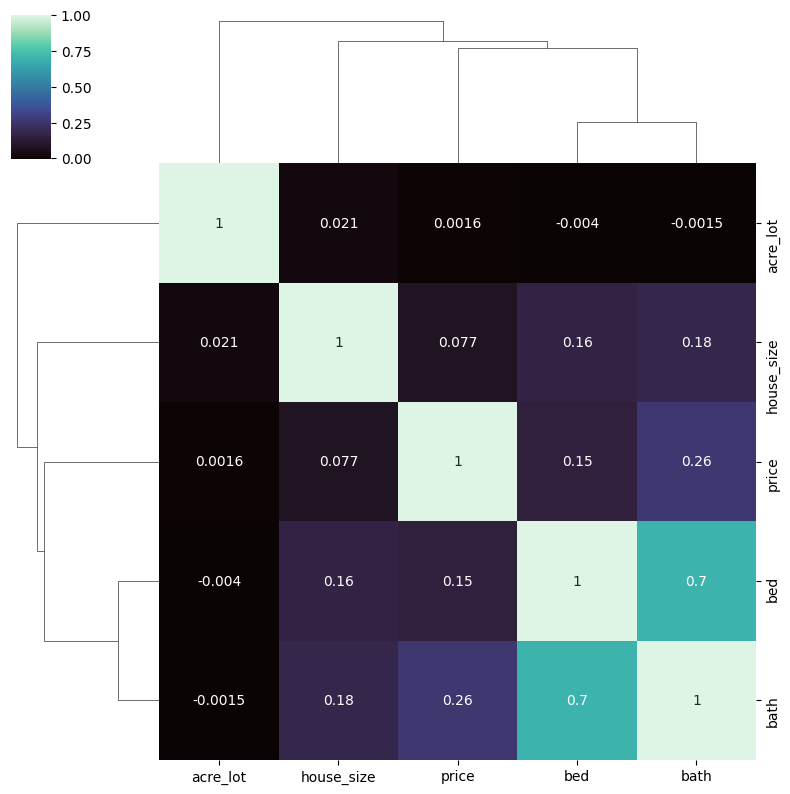

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.clustermap(
    data.corr(),
    annot=True,
    cmap='mako',
    figsize=(8, 8)
)
plt.show

As can be seen, there is a correlation between  the bath and the bed a nd the house price and also a correlation between the house size and the bed a and bath but not much of a correlation between the price and the acre lot. It is also necessary to view the distribution of the dataset accross many criteria beginning with the bed as shown below showing that there is a high distribution of houses with two, three and four bed rooms, and we can see that the range of bed rooms also extends to a high number but low amount of value counts.

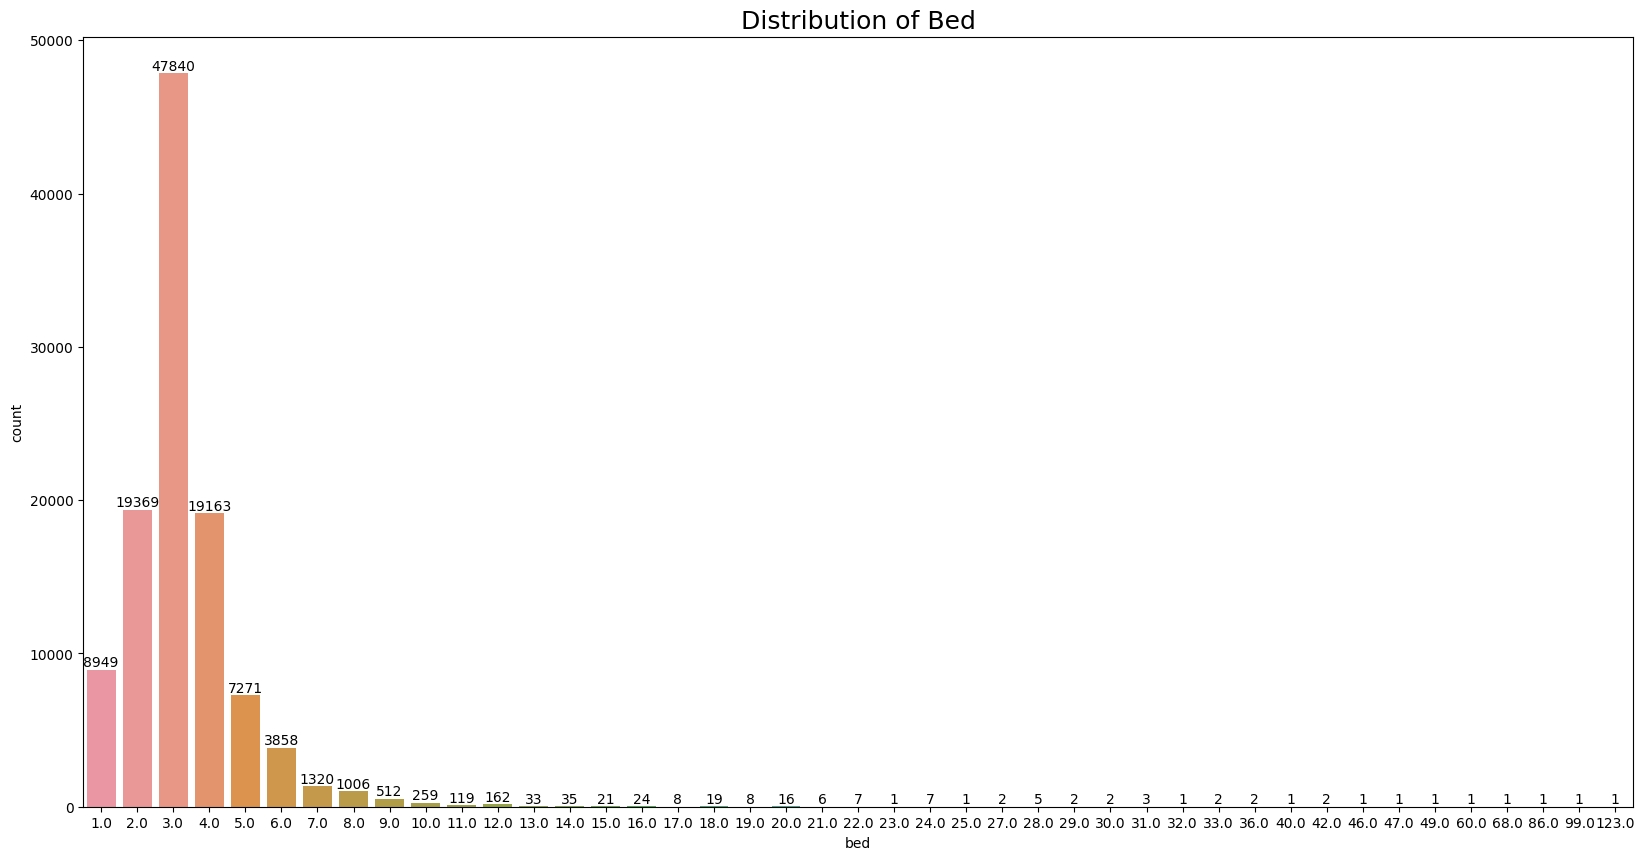

In [ ]:


plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x='bed')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bed', fontsize=18)
plt.show()



A similar pattern can also be observed for the distribution of the bath as shown below with a high value in a particular range of between two and five baths and also an extended range with much lower value counts

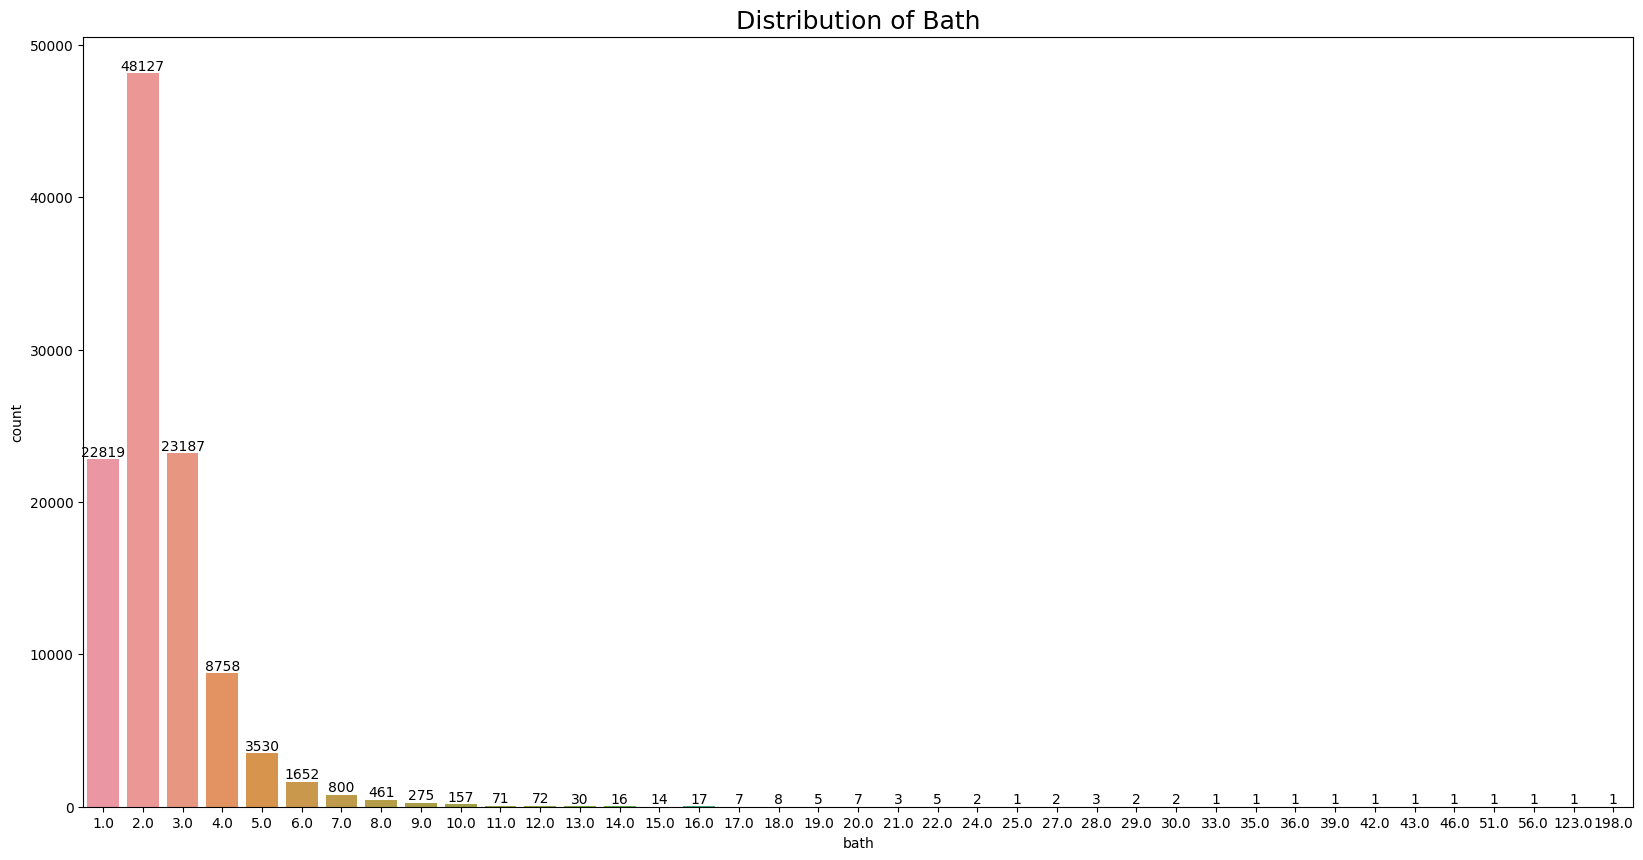

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x='bath')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bath', fontsize=18)
plt.show()

At this point there exisits some categorical data colums like the city, zip code and the state, since the linear regression model only accepts numerical values, a method called dummy encoding is applied to turn all the ctaegorical columns into numeric data types by the use of the get dummies method as shown below:





In [ ]:
for col in data.dtypes[data.dtypes == 'object'].index:
  for_dummy = data.pop(col)
  data = pd.concat([data, pd.get_dummies(for_dummy, prefix=col)], axis=1)
pd.set_option('display.max_columns', None)
data.head()

,bed,bath,acre_lot,house_size,price,status_for_sale,status_ready_to_build,state_Connecticut,state_Delaware,state_Georgia,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_Tennessee,state_Vermont,state_Virgin Islands,state_Virginia,state_West Virginia,state_Wyoming,zip_code_cat_8226.0,zip_code_cat_8401.0,zip_code_cat_8527.0,zip_code_cat_8831.0,zip_code_cat_10003.0,zip_code_cat_10011.0,zip_code_cat_10013.0,zip_code_cat_10016.0,zip_code_cat_10019.0,zip_code_cat_10021.0,zip_code_cat_10022.0,zip_code_cat_10023.0,zip_code_cat_10024.0,zip_code_cat_10025.0,zip_code_cat_10028.0,zip_code_cat_10065.0,zip_code_cat_10075.0,zip_code_cat_10128.0,zip_code_cat_11201.0,zip_code_cat_11235.0,zip_code_cat_other_code,city_cat_Boston,city_cat_Bridgeport,city_cat_Bronx,city_cat_Brooklyn,city_cat_Jersey City,city_cat_Manchester,city_cat_Manhattan,city_cat_Middletown,city_cat_New York,city_cat_New York City,city_cat_Newark,city_cat_Philadelphia,city_cat_Providence,city_cat_San Juan,city_cat_Stamford,city_cat_Staten Island,city_cat_Toms River,city_cat_Trenton,city_cat_Waterbury,city_cat_Wilmington,city_cat_other_city
0,3.0,2.0,0.12,920.000000,105000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,2.0,0.08,1527.000000,80000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,0.15,748.000000,67000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.0,2.0,0.10,1800.000000,145000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6.0,2.0,0.05,2158.001979,65000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


After the dummy encoding it is also important to view the dimensions of the resulting dataset as shown below:

In [ ]:
data.shape

(110044, 67)

As can be seen above the dartaset has now been expanded by the get dummies method and now has sixty seven columns.

The next stage in the process is to remove all the outliers that were first noticed in the data description process. In order to do this the values for the first quantile(or the twenty fifth percentile) and the third quantile (or the seventy fifth percentile) as shown below:

In [ ]:
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
Q1, Q3



(250000.0, 801995.0)

From the values that are obtained for the first and the third quantile, a value called the inter quantile range is calculated which is just the difference between the upper limit and the lower limit. With this value, the lower limit and the higher limit for acceptable values can then be calculated from the dataset:

In [ ]:
IQR = Q3 -Q1
IQR

551995.0

In [ ]:

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 *IQR)
lower_limit, upper_limit

(-577992.5, 1629987.5)

Since the lower limit gives a negative value, then in this it will be assumed that only the higher values in the data set will contain the outliers and hence only values beyond the upper limit will be removed as follows:

In [ ]:
data_no_outlier = data[data.price < upper_limit]

After the removal of the outliers, what now remains is the separating of the dataset into the dependent variables which in this case is the price column and the independent variables which are the rest of the columns as follows

In [ ]:
X = data_no_outlier.drop('price', axis=1)
y = data_no_outlier['price']
X.shape, y.shape

((98406, 66), (98406,))

After the separation of the data what now remains is the splitting of the data into the training set, that will be used to train the regression mdel and the testing set that will be used to determine the accuracy of the model, this is done on the ratio of eighty percent training set to twenty percent testing set and also a random state parameter is set of forty two. After this is done the dimensions of the new datasets are also viewed just to make sure and also some maths cam be carried out to verify that the ratio of the number of rows between the training set and the test set is indeed eighty percent to twenty per cent.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Set Shape:', X_train.shape, y_train.shape)
print('Testing Set Shape:', X_test.shape, y_test.shape)

Training Set Shape: (78724, 66) (78724,)
Testing Set Shape: (19682, 66) (19682,)


After the dataset is split the final step is to now to fit the linear regression model through the importing of the linear regression function from the 'sklearn' library. After the model has been fit, a new dataset called "y_ped" is created wich will contain dataset of price predictions based on the test dataset of "X_test" predictor variables obtained from the split. After this dataset is created, the shape or the dimensions is also checked to see if it fall within the expected range of which it does in accordance with the test shape.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape


(19682,)

After predicting the values on the test data, what now remains is to get the various metrics on the model like the R2 Score which  is a statistical measure that represents the proportion of the variance in the dependent variable (the target) that is explained by the independent variables in a regression model. The Mean Squared Error (MSE) which is a metric used to measure the average squared difference between the predicted values and the actual values in a set of data and lastly the mean absolute error which is   the average absolute difference between the predicted values and the actual values.Finally a view of  the coeficients is also obtained which represents the relationship between the different dependant variables and the independent variable and also the intercept which is the starting point of the regression line, that is what the price is without considering any of the variables.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_
print('Intercept: %.2f' %  intercept)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Intercept:", intercept)
for coeficient in lr.coef_:
    print('Coefficient: %.2f' %  coeficient)

Intercept: 345922.12
R2 Score: 0.4177698101078704
Mean Squared Error: 69248870473.21692
Mean Absolute Error: 193256.2379107165
Intercept: 345922.1225590375
Coefficient: -652.33
Coefficient: 162234.10
Coefficient: -0.04
Coefficient: 5.24
Coefficient: -200168.09
Coefficient: 200168.09
Coefficient: 16985.30
Coefficient: -2704.93
Coefficient: -85267.72
Coefficient: -69665.80
Coefficient: 174238.86
Coefficient: 26868.63
Coefficient: 84566.53
Coefficient: 209245.52
Coefficient: 10936.60
Coefficient: -106259.53
Coefficient: 100657.08
Coefficient: -306001.05
Coefficient: -290051.76
Coefficient: -34226.30
Coefficient: -8922.82
Coefficient: 230619.75
Coefficient: 0.00
Coefficient: 48981.64
Coefficient: 363551.23
Coefficient: -233010.21
Coefficient: 1814.88
Coefficient: -88828.30
Coefficient: 92109.94
Coefficient: 53546.01
Coefficient: 352067.61
Coefficient: -40344.96
Coefficient: 16283.57
Coefficient: -40661.41
Coefficient: -135642.27
Coefficient: 22365.67
Coefficient: 15647.62
Coefficient: 3465

**RESULTS**

From the results it is shown that the model has an R 2 score of 0.42 or forty two percent. This mens that means that forty two per cent of the variability in the response variable is explained by the model, and the remaining fifty eight percent is unexplained. The other two values are numeric values that shows the difference between the predicted values and the actual values which in our case shows a figure of one hundred and ninety three thousand, two hundred and fifty six as the mean avaredge error which is the avaredge difference between the two values. On the other hand the mean squared error also shows a value for the avaredge squared value of the differences between the two values. lastly we also have a numeric value for the intercepts and the coeficients.

The next step is to make a plot of the predicted values against the actual valued to see if there is any correlation btween the two datasets.

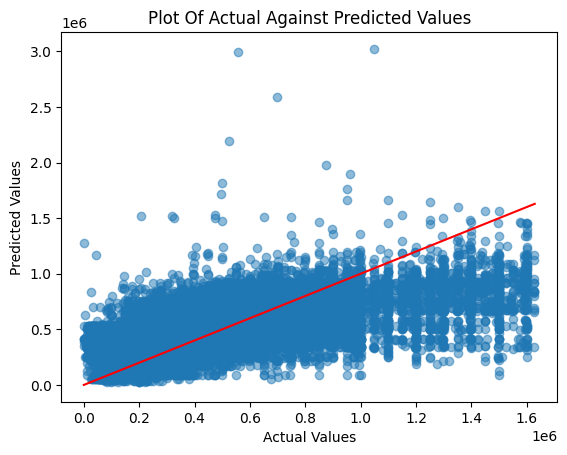

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Plot Of Actual Against Predicted Values')
plt.show()


as can be seen the values shows a gradual trend of moving upwards in accordance with the line and with the exception of a few extreme values, the ponts are not generally scattered about which is a good scenario for a linear regression model.

Next up is a plot of the residuals against the predicted values to also check the quality of the models.

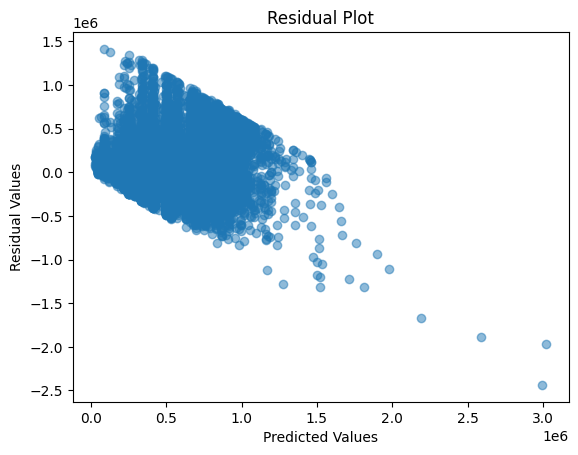

In [ ]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Residual Plot')
plt.show()


As can be seen from the plot shows a somewhat random dispersion around the zero mark indicating no visible trend which is also a good indicator for a linear regression model

After the model has been trained the last part of the this stage is the actual packaging of the regression model  through the use of the pickle library into a file called finalized model that is stored for later use.

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
from google.colab import files
files.download('finalized_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>